In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 df=pd.read_csv('/content/drive/My Drive/Projects/solarpower_cumuldaybyday2.csv',parse_dates=True)

In [0]:
df['date']=df.date.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))

In [0]:
df.drop('Unnamed: 2',axis=1,inplace=True)

In [17]:
print('Start Date :',df['date'].min())
print('End Date :',df['date'].max())

Start Date : 2011-10-26 00:00:00
End Date : 2018-10-26 00:00:00


we have 7 years data of electricity consumption

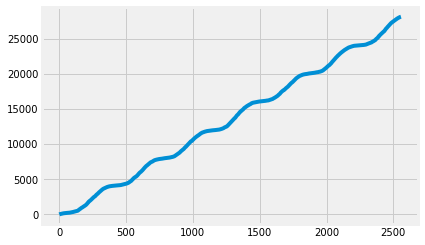

In [14]:
df['cum_power'].plot()

We can see upward trend that our data have.

In [18]:
df.head(5)

,date,cum_power
0,2011-10-26,0.1
1,2011-10-27,10.2
2,2011-10-28,20.2
3,2011-10-29,29.6
4,2011-10-30,34.2


In [19]:
df.isnull().sum()

date         0
cum_power    0
dtype: int64

In [20]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [0]:
new_df=df.copy()
new_df.index=new_df.date
new_df.drop('date',axis=1,inplace=True)

In [0]:
train=new_df[:'2017']
valid=new_df['2018']

In [0]:

import statsmodels.api as sm
from pyramid.arima import auto_arima

In [37]:
model=auto_arima(train,trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)


forecast=model.predict(n_periods=len(valid))

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=13459.822, BIC=13494.156, Fit time=2.703 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=15881.556, BIC=15893.000, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=14016.162, BIC=14033.328, Fit time=0.199 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=14879.982, BIC=14897.149, Fit time=0.523 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=13459.556, BIC=13488.167, Fit time=1.430 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=13511.706, BIC=13534.595, Fit time=0.970 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=13460.417, BIC=13494.750, Fit time=2.193 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=13462.861, BIC=13502.917, Fit time=3.874 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=14516.796, BIC=14539.685, Fit time=0.884 seconds
Total fit time: 12.

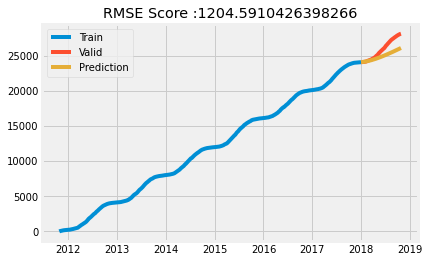

In [38]:
from sklearn.metrics import mean_squared_error
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.title('RMSE Score :{}'.format(np.sqrt(mean_squared_error(valid,forecast))))
plt.show()

In [64]:
#prophet
!pip install Prophet

In [0]:
new_df=df.copy()
#rename our columns as per prophet manual
new_df.rename({'date':'ds','cum_power':'y'},axis=1,inplace=True)

In [0]:

train=new_df[new_df['ds']<'2018']
valid=new_df[new_df['ds']>'2018']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


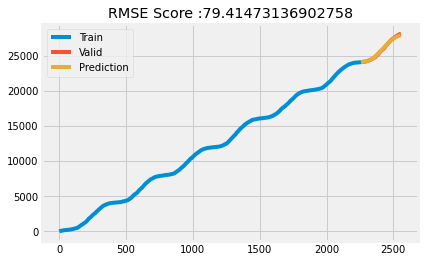

In [72]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)

power_cum=model.make_future_dataframe(periods=len(valid))

forecast=model.predict(power_cum)

valid_forecast=forecast['yhat'][2259:]

#plot the predictions for validation set
plt.plot(train['y'], label='Train')
plt.plot(valid['y'], label='Valid')
plt.plot(valid_forecast, label='Prediction')
plt.legend()
plt.title('RMSE Score :{}'.format(np.sqrt(mean_squared_error(valid['y'],valid_forecast))))
plt.show()
 



In [0]:
# lets go fot LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Bidirectional
from sklearn.preprocessing import MinMaxScaler

Epoch 1/20
 - 4s - loss: 0.0102
Epoch 2/20
 - 3s - loss: 4.5278e-05
Epoch 3/20
 - 3s - loss: 1.1036e-05
Epoch 4/20
 - 3s - loss: 9.0844e-07
Epoch 5/20
 - 3s - loss: 1.6563e-06
Epoch 6/20
 - 3s - loss: 2.4277e-06
Epoch 7/20
 - 3s - loss: 2.6390e-06
Epoch 8/20
 - 3s - loss: 2.1855e-06
Epoch 9/20
 - 3s - loss: 3.0578e-06
Epoch 10/20
 - 3s - loss: 2.0382e-06
Epoch 11/20
 - 3s - loss: 2.5158e-06
Epoch 12/20
 - 3s - loss: 1.5798e-06
Epoch 13/20
 - 3s - loss: 2.1176e-06
Epoch 14/20
 - 3s - loss: 2.0202e-06
Epoch 15/20
 - 3s - loss: 1.7083e-06
Epoch 16/20
 - 3s - loss: 2.2095e-06
Epoch 17/20
 - 3s - loss: 1.7731e-06
Epoch 18/20
 - 3s - loss: 1.5772e-06
Epoch 19/20
 - 3s - loss: 2.0231e-06
Epoch 20/20
 - 3s - loss: 1.2549e-06
Train Score: 15.66 RMSE
Test Score: 26.72 RMSE


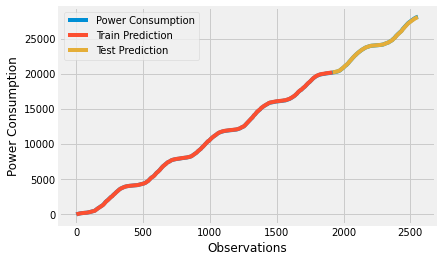

In [87]:
#data preparation
def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)


data = "/content/drive/My Drive/Projects/solarpower_cumuldaybyday2.csv"

np.random.seed(7)

df = pd.read_csv(data, usecols=[1])
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.75), :]
test_dataset = dataset[int(len(dataset)*0.75):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(Bidirectional(LSTM(20, input_shape=(1, lookback))))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset) 
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Power Consumption")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

see we got good RMSE score 